# CDS: Numerical Methods - Assignment 4

#### See lecture notes and documentation on Brightspace for Python and Jupyter basics. If you are stuck, try to google or get in touch via Discord!

- Solutions must be submitted via Brightspace as a Jupyter notebook (\*.ipynb) before **Wednesday, February 24, 8:30 CET.**

### Handing-in:

1. Click "Kernel -> Restart & Run All"
2. Check all outputs (In[\*] or Out[\*]) for errors and **resolve them if necessary**
3. Click again "Kernel -> Restart & Run All"
4. Save as assignment_04_TEAM-NUMBER.ipynb by clicking "File -> Save as ..."
5. Download your assignment_\*.ipynb file
6. Upload it **in time (before the deadline)** to Brightspace

## 1. Linear Equation Systems

In the following you will implement the Jacobi, Steepest Decent (SD) and the Conjugate Gradient (CG) algorithms to solve linear equation systems of the form 

$$A \mathbf{x} = \mathbf{b},$$ 

with $A$ being an $n \times n$ matrix.

### Task 1.1
First, you need to implement a Python function $\text{diff(a,b)}$, which returns the difference $\text{d}$ between two $n$-dimensional vectors $\text{a}$ and $\text{b}$ according to 

$$ d = || \mathbf{a} - \mathbf{b}||_\infty = \underset{i=1,2,\dots,n}{\operatorname{max}} |a_i - b_i|. $$

In [1]:
import numpy as np

def diff(a, b):
    assert len(a)==len(b), "Vectors not of the same length"
    return np.max(np.abs(a-b))



### Task 1.2 

Implement the Jacobi iteration scheme 

$$\mathbf{x}^{(k)} = D^{-1}(L + U)\mathbf{x}^{(k-1)} + D^{-1}\mathbf{b},$$ 

where the matrix $A = D - L - U$ has been separated into its diagonal ($D$), lower triangular ($L$) and its upper triangular ($U$) form. 

Write a Python function $\text{jacobi(A, b, eps)}$, where $\text{A}$ represents the $n \times n$ $A$ matrix, $\text{b}$ represents the $n$-dimensional solution vector $\mathbf{b}$, and $\text{eps}$ is a scalar $\varepsilon$ defining the accuracy up to which the iteration is performed. Your function should return both the solution vector $\mathbf{x}^{(k)}$ from the last iteration step and the corresponding iteration index $k$. 

Use an assertion to make sure the diagonal elements of $A$ are all non-zero. Initialize your iteration with $\mathbf{x}^{(0)} = \mathbf{0}$ (or with $\mathbf{x}^{(1)} = D^{-1}\mathbf{b}$) and increase $k$ until $|| \mathbf{x}^{(k)} - \mathbf{x}^{(k-1)}||_\infty < \varepsilon$. 

Hint: Use $\text{numpy.dot()}$ for all needed matrix/vector products.

In [2]:

def jacobi(A, b, eps):
    assert np.all(np.diag(A) != 0)
    L = -1* np.tril(A,-1)
    U = -1* np.triu(A,1)
    D = A + L + U
    D_inv = np.linalg.inv(D)
    x_k = np.zeros(np.shape(A)[0])
    x = x_k+100
    k = 0
    while diff(x_k, x) > eps:
        x = x_k
        x_k = np.dot(D_inv, np.dot(L+U, x)) + np.dot(D_inv, b)
        k+=1
    
    return x_k, k
    
    

    
    

### Task 1.3

Verify your implementation by comparing your approximate result to an exact solution. Use $\text{numpy.linalg.solve()}$ to obtain the exact solution of the system

$$
\begin{align*}
    \begin{pmatrix}
        10 & -1 & 2 & 0 \\ 
        -1 & 11 &-1 & 3 \\
         2 & -1 & 10&-1 \\
         0 &  3 & -1& 8
    \end{pmatrix} \mathbf{x}^*
    =
    \begin{pmatrix}
    6 \\
    25 \\
    -11\\
    15
    \end{pmatrix}
\end{align*}
$$

Then compare you approximate result $\mathbf{\tilde{x}}$ to the exact result $\mathbf{x^*}$ by calculating $|| \mathbf{x}^* - \mathbf{\tilde{x}}||_\infty$ for different accuracies $\varepsilon = 10^{-1}, 10^{-2}, 10^{-3}, 10^{-4}$. Implement a unit test for your function using this system.

Text(0, 0.5, 'Diff')

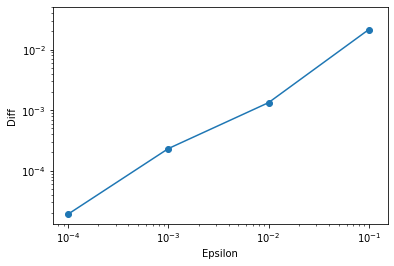

In [3]:
import matplotlib.pyplot as plt

A = np.array([[10,-1,2,0],[-1,11,-1,3], [2,-1,10,-1], [0,3,-1,8]])
b = np.array([6,25,-11,15])

solution = np.linalg.solve(A,b)
diff_sol = np.zeros(4)
for i in range(4):
    diff_sol[i] = diff(solution, jacobi(A,b, 10**-(i+1))[0])

plt.scatter(10**(-1*np.arange(1,5, dtype = 'float')), diff_sol)
plt.plot(10**(-1*np.arange(1,5, dtype = 'float')), diff_sol)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Epsilon")
plt.ylabel('Diff')


In [4]:
# load ipytest
import ipytest
ipytest.autoconfig()

In [5]:
%%run_pytest[clean]

def test_jacobi():
    A = np.array([[10,-1,2,0],[-1,11,-1,3], [2,-1,10,-1], [0,3,-1,8]])
    b = np.array([6,25,-11,15])
    solution = np.linalg.solve(A,b)
    jac = jacobi(A,b, 10**-9)[0]
    
    assert np.allclose(solution, jac, rtol=1e-9,atol=1e-11, equal_nan=False)
    

.                                                                        [100%]
1 passed in 0.05s


### Task 1.4

Next, implement the Steepest Descent algorithm in a similar Python function $\text{SD(A, b, eps)}$, which calculates

\begin{align*}
    \mathbf{v}^{(k)} &= \mathbf{b} - A \mathbf{x}^{(k-1)} \\
    t_k &= \frac{ \langle \mathbf{v}^{(k)}, \mathbf{v}^{(k)} \rangle }{ \langle \mathbf{v}^{(k)}, A \mathbf{v}^{(k)}\rangle } \\
    \mathbf{x}^{(k)} &= \mathbf{x}^{(k-1)} + t_k \mathbf{v}^{(k)} .
\end{align*}

Initialize your iteration again with $\mathbf{x}^{(0)} = \mathbf{0}$ and increase $k$ until $|| \mathbf{x}^{(k)} - \mathbf{x}^{(k-1)}||_\infty < \varepsilon$. Return the solution vector $\mathbf{x}^{(k)}$ from the last iteration step and the corresponding iteration index $k$. Implement a unit test for your implementation by comparing your result to the exact solution of the system in task 1.3.
Use $\text{numpy.dot()}$ for all needed vector/vector and matrix/vector products. 

In [6]:
def SD(A, b, eps):
    x_k = np.zeros(np.shape(A)[0])
    x = x_k+100
    k = 0
    while diff(x, x_k) > eps:
        x = x_k
        v_k = b - np.dot(A, x)
        t_k = np.dot(v_k, v_k) / np.dot(v_k, np.dot(A, v_k))
        x_k = x + t_k * v_k
        k+=1
    return x_k, k


In [7]:
%%run_pytest[clean]

def test_SD():
    A = np.array([[10,-1,2,0],[-1,11,-1,3], [2,-1,10,-1], [0,3,-1,8]])
    b = np.array([6,25,-11,15])
    solution = np.linalg.solve(A,b)
    sd = SD(A,b, 10**-9)[0]
    
    assert np.allclose(solution, sd, rtol=1e-9,atol=1e-11, equal_nan=False)
    

.                                                                        [100%]
1 passed in 0.01s


### Task 1.5

Finally, based on your steepest decent implementation from task 1.4, implement the Conjugate Gradient algorithm in a Python function $\text{CG(A, b, eps)}$ in the following way: 

Initialize your procedure with:

\begin{align*}
    \mathbf{x}^{(0)} &= \mathbf{0} \\
    \mathbf{r}^{(0)} &= \mathbf{b} - A \mathbf{x}^{(0)} \\
    \mathbf{v}^{(0)} &= \mathbf{r}^{(0)}
\end{align*}

Then increase $k$ and repeat the following until $|| \mathbf{x}^{(k)} - \mathbf{x}^{(k-1)}||_\infty < \varepsilon$.

\begin{align*}
    t_k &= \frac{ \langle \mathbf{r}^{(k)}, \mathbf{r}^{(k)} \rangle }{ \langle \mathbf{v}^{(k)}, A \mathbf{v}^{(k)} \rangle } \\
    \mathbf{x}^{(k+1)} &= \mathbf{x}^{(k)} + t_k \mathbf{v}^{(k)} \\
    \mathbf{r}^{(k+1)} &= \mathbf{r}^{(k)} - t_k A \mathbf{v}^{(k)} \\
    s_k &= \frac{ \langle \mathbf{r}^{(k+1)}, \mathbf{r}^{(k+1)} \rangle }{ \langle \mathbf{r}^{(k)}, \mathbf{r}^{(k)} \rangle } \\
    \mathbf{v}^{(k+1)} &= \mathbf{r}^{(k+1)} + s_k \mathbf{v}^{(k)}
\end{align*}

Return the solution vector $\mathbf{x}^{(k)}$ from the last iteration step and the corresponding iteration index $k$. Implement a unit test for your implementation by comparing your result to the exact solution of the system in task 1.3.
Use $\text{numpy.dot()}$ for all needed vector/vector and matrix/vector products.

How do you expect the number of needed iteration steps to behave when changing the accuracy $\epsilon$? What do you see?

Text(0, 0.5, 'Number of Iterations')

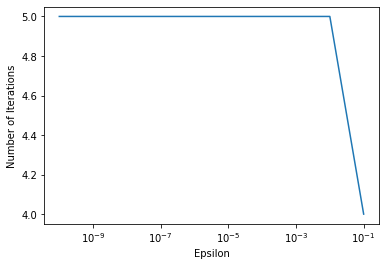

In [8]:
def CG(A, b, eps):
    x_k = np.zeros(np.shape(A)[0])
    r_k = b - np.dot(A, x_k)
    v_k = r_k
    x = x_k + 100
    k = 0
    
    while diff(x, x_k) > eps:
        x = x_k
        r = r_k
        v = v_k
        
        t_k = np.dot(r, r)/np.dot(v, np.dot(A,v))
        x_k = x + t_k * v
        r_k = r - t_k * np.dot(A, v)
        s_k = np.dot(r_k, r_k)/np.dot(r,r)
        v_k = r_k + s_k * v
        k+=1
    return x_k, k


A = np.array([[10,-1,2,0],[-1,11,-1,3], [2,-1,10,-1], [0,3,-1,8]])
b = np.array([6,25,-11,15])

k = np.zeros(10)
eps = 10**(-1*np.arange(1,11, dtype='float'))
for i, ep in enumerate(eps):
    k[i] = CG(A, b, ep)[1]


plt.plot(eps, k)
plt.xscale('log')
plt.xlabel('Epsilon')
plt.ylabel('Number of Iterations')

    




We would expect the number of iterations to be dependent on the accuracy we desire (eps). Instead it seems like the algorithm finds an exact solution at 5 iterations.

In [9]:
%%run_pytest[clean]

def test_CG():
    A = np.array([[10,-1,2,0],[-1,11,-1,3], [2,-1,10,-1], [0,3,-1,8]])
    b = np.array([6,25,-11,15])
    solution = np.linalg.solve(A,b)
    cg = CG(A,b, 10**-9)[0]
    
    assert np.allclose(solution, cg, rtol=1e-10,atol=1e-12, equal_nan=False)

.                                                                        [100%]
1 passed in 0.01s


### Task 1.6

Apply all three methods to the following system

\begin{align*}
\begin{pmatrix}
0.2&  0.1&  1.0& 1.0&   0.0 \\ 
0.1&  4.0& -1.0& 1.0&  -1.0 \\
1.0& -1.0& 60.0& 0.0&  -2.0 \\
1.0&  1.0&  0.0& 8.0&   4.0 \\
0.0& -1.0& -2.0& 4.0& 700.0
\end{pmatrix} \mathbf{x}^*
=
\begin{pmatrix}
1 \\
2 \\
3 \\
4 \\
5
\end{pmatrix}.
\end{align*}
    
Plot the number of needed iterations for each method as a function of $\varepsilon$, using $\varepsilon = 10^{-1}, 10^{-2}, ..., 10^{-8}$.

Explain the observed behavior with the help of the condition number (which you can calculate using $\text{numpy.linalg.cond()}$). 

The condition number is: 12265.159140471394
The solution given by numpy is: x = [ 7.85971308  0.42292641 -0.07359224 -0.54064302  0.01062616]




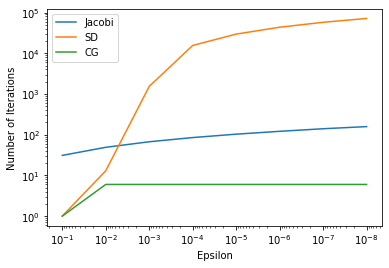

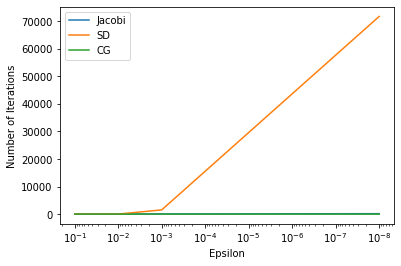

In [16]:
A = np.array([[0.2, 0.1, 1.0, 1.0, 0], [0.1, 4.0, -1.0, 1.0, -1.0], [1.0, -1.0, 60.0, 0.0, -2.0], [1.0, 1.0, 0.0, 8.0, 4.0], [0.0, -1.0, -2.0, 4.0, 700.0]])
b = np.array([1,2,3,4,5])

print(f'The condition number is: {np.linalg.cond(A)}')
print(f"The solution given by numpy is: x = {np.linalg.solve(A,b)}\n\n")

eps = 10**(-1*np.arange(1,9, dtype='float'))
jac = np.zeros(8)
sd = np.zeros(8)
cg = np.zeros(8)

for i, ep in enumerate(eps):
    jac[i] = jacobi(A,b, ep)[1]
    sd[i] = SD(A,b, ep)[1]
    cg[i] = CG(A,b,ep)[1]

fig, ax = plt.subplots(1,1)
ax.plot(eps, jac, label='Jacobi')
ax.plot(eps, sd, label = 'SD')
ax.plot(eps, cg, label = 'CG')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
ax.set_xlabel('Epsilon')
ax.set_ylabel('Number of Iterations')
ax.invert_xaxis()

fig, ax = plt.subplots(1,1)
ax.plot(eps, jac, label='Jacobi')
ax.plot(eps, sd, label = 'SD')
ax.plot(eps, cg, label = 'CG')
#ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
ax.set_xlabel('Epsilon')
ax.set_ylabel('Number of Iterations')
ax.invert_xaxis()


The condition number is >>1, so the solution is susceptible to round off errors

### [Optional] Task 1.7 

Try to get a better convergence behavior by pre-conditioning your matrix $A$. Instead of $A$ use

$$ \tilde{A} = C A C,$$

where $C = \sqrt{D^{-1}}$. If you do so, you will need to replace $\mathbf{b}$ by 

$$\mathbf{\tilde{b}} = C \mathbf{b}$$

and the vector $\mathbf{\tilde{x}}$ returned by one of your methods will have to be transformed back via

$$\mathbf{x} = C \mathbf{\tilde{x}}.$$ 

What is the effect of $C$ on the condition number and why?

The condition number is: 12.025984029659853
The solution given by numpy is: x = [ 7.85971308  0.42292641 -0.07359224 -0.54064302  0.01062616]




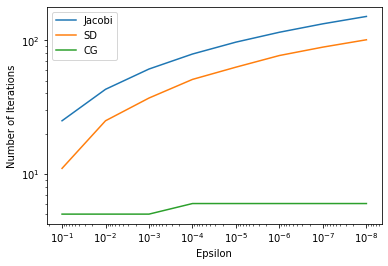

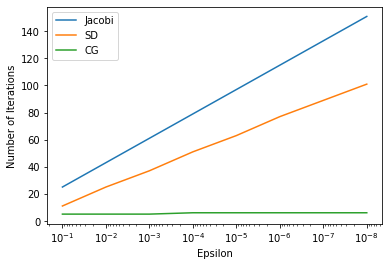

In [15]:
A = np.array([[0.2, 0.1, 1.0, 1.0, 0], [0.1, 4.0, -1.0, 1.0, -1.0], [1.0, -1.0, 60.0, 0.0, -2.0], [1.0, 1.0, 0.0, 8.0, 4.0], [0.0, -1.0, -2.0, 4.0, 700.0]])
b = np.array([1,2,3,4,5])
L = -1* np.tril(A,-1)
U = -1* np.triu(A,1)
D = A + L + U
C = np.sqrt(np.linalg.inv(D))
A_pc = np.dot(C, np.dot(A,C))
b_pc = np.dot(C,b)

print(f'The condition number is: {np.linalg.cond(A_pc)}')
print(f"The solution given by numpy is: x = {np.dot(C, np.linalg.solve(A_pc,b_pc))}\n\n")

eps = 10**(-1*np.arange(1,9, dtype='float'))
jac = np.zeros(8)
sd = np.zeros(8)
cg = np.zeros(8)

for i, ep in enumerate(eps):
    jac[i] = jacobi(A_pc,b_pc, ep)[1]
    sd[i] = SD(A_pc,b_pc, ep)[1]
    cg[i] = CG(A_pc,b_pc,ep)[1]

fig, ax = plt.subplots(1,1)
ax.plot(eps, jac, label='Jacobi')
ax.plot(eps, sd, label = 'SD')
ax.plot(eps, cg, label = 'CG')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
ax.set_xlabel('Epsilon')
ax.set_ylabel('Number of Iterations')
ax.invert_xaxis()

fig, ax = plt.subplots(1,1)
ax.plot(eps, jac, label='Jacobi')
ax.plot(eps, sd, label = 'SD')
ax.plot(eps, cg, label = 'CG')
#ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
ax.set_xlabel('Epsilon')
ax.set_ylabel('Number of Iterations')
ax.invert_xaxis()

C decreases the condition number by getting eigenvalues of A closer to 1

# Weekly Reflection

- How do you judge the level of the last lecture on a scale from 1 to 5?
- with: 1: easy to follow, 3: OK to follow, 5: too complicated to follow

- How long did it take you to complete this assignment?

- How hard was it to finish this assignment on a scale from 1 to 5?
- with: 1: easy / no help needed, 3: could solve with guidance, 5: could not solve it